# Importing Necessary Libraries

---



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder


# Data Set - MyMovies

---



In [ ]:
df=pd.read_csv("/content/my_movies.csv")
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


# Problem Statement

---



>Prepare rules for the data sets 
* 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
* 2) Change the minimum length in apriori algorithm
* 3) Visulize the obtained rules using different plots 


# EDA

In [ ]:
df.shape

(10, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sixth Sense,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
Gladiator,10.0,0.7,0.483046,0.0,0.25,1.0,1.0,1.0
LOTR1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Patriot,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
LOTR2,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter2,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
LOTR,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Braveheart,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Green Mile,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0


In [ ]:
df.columns.to_list()

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'Sixth Sense',
 'Gladiator',
 'LOTR1',
 'Harry Potter1',
 'Patriot',
 'LOTR2',
 'Harry Potter2',
 'LOTR',
 'Braveheart',
 'Green Mile']

In [ ]:
df.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [ ]:
for col in df:
    print(f'{col}: {df[col].unique()}')

V1: ['Sixth Sense' 'Gladiator' 'LOTR1' 'Harry Potter1']
V2: ['LOTR1' 'Patriot' 'LOTR2' 'Harry Potter2' 'LOTR']
V3: ['Harry Potter1' 'Braveheart' nan 'Sixth Sense' 'Gladiator']
V4: ['Green Mile' nan]
V5: ['LOTR2' nan]
Sixth Sense: [1 0]
Gladiator: [0 1]
LOTR1: [1 0]
Harry Potter1: [1 0]
Patriot: [0 1]
LOTR2: [1 0]
Harry Potter2: [0 1]
LOTR: [0 1]
Braveheart: [0 1]
Green Mile: [1 0]


# Removing Unnecessary Columns

In [ ]:
df = df.iloc[:,5:]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


# Apriori Algorithm 

## Different Values for Support and Confidence

In [ ]:
#Defining necessary function for the association rules
def rules(df,confidence,support):
    ap = {}
    for i in confidence:
        frequent_itemsets =apriori(df,min_support=support,use_colnames=True)
        rule = association_rules(frequent_itemsets,min_threshold=i)
        ap[i] = len(rule.antecedents) #will show the number of rules
    return pd.Series(ap).to_frame("Support: %s"%support)

In [ ]:
#defining different values of support and confidence
support = [0.001,0.005,0.01,0.05,0.1]
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [ ]:
# finding the number of rules for the different values of support and confidence
confs = []
for i in support:
    ap_i1 = rules(df,confidence=confidence,support=i)
    confs.append(ap_i1)

In [ ]:
all_confs= pd.concat(confs,axis=1)
all_confs

,Support: 0.001,Support: 0.005,Support: 0.01,Support: 0.05,Support: 0.1
0.1,250,250,250,250,250
0.2,220,220,220,220,220
0.3,217,217,217,217,217
0.4,216,216,216,216,216
0.5,216,216,216,216,216
0.6,134,134,134,134,134
0.7,129,129,129,129,129
0.8,128,128,128,128,128
0.9,125,125,125,125,125


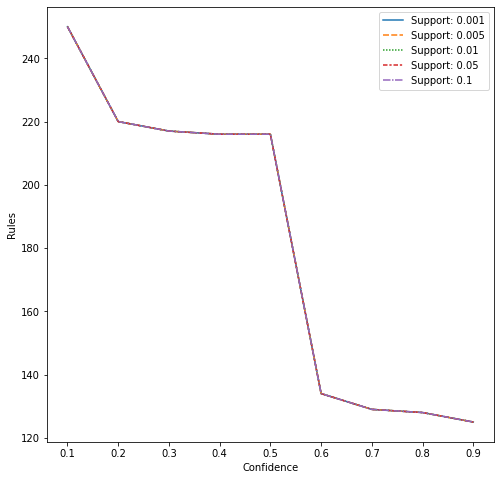

In [ ]:
#visualizing the number of rules for different values of support and confidence
plt.figure(figsize=(8,8))
sns.lineplot(data=all_confs)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

### Conclusion:

As seen in the plot, the number of rules decreases as the value of support and confidence increases

## Specific Value for Support and Lift

In [ ]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


> We can interpret our resulting table as follows. You can write the different situations you see in the table as comments :)

* Support Value -> shows that The rate of seeing (Sixth Sense) and (Gladiator)	 together in all purchases is 0.50.

* Confidence Value -> shows that 83% of customers who buy (Sixth Sense) also buy (Gladiator).

* Lift Value -> shows that Sales of (Gladiator) increase by 1.190 for purchases with (Sixth Sense).

In [ ]:
print("There are {} Relation derived.".format(len(rules)))

There are 238 Relation derived.


In [ ]:
rules.sort_values('lift',ascending = True)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,"(Sixth Sense, Gladiator)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.00
46,(Green Mile),"(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.00
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
34,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
35,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
37,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.50
32,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.00


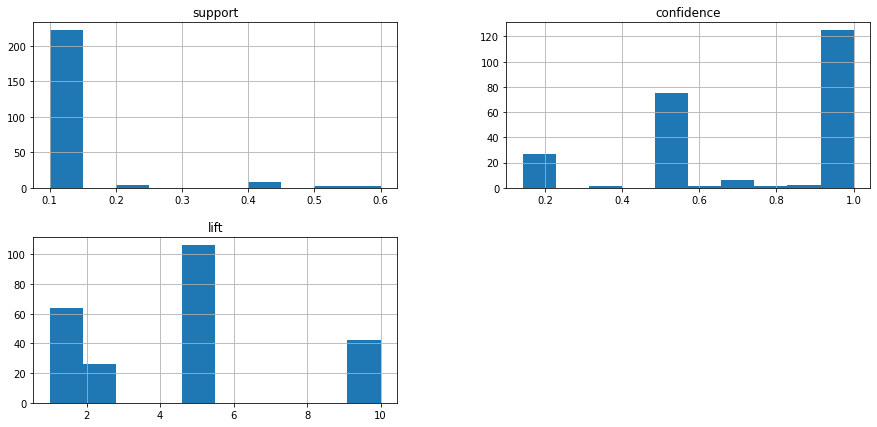

In [ ]:
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

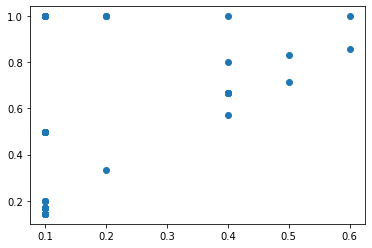

In [ ]:
plt.scatter(rules['support'], rules['confidence'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


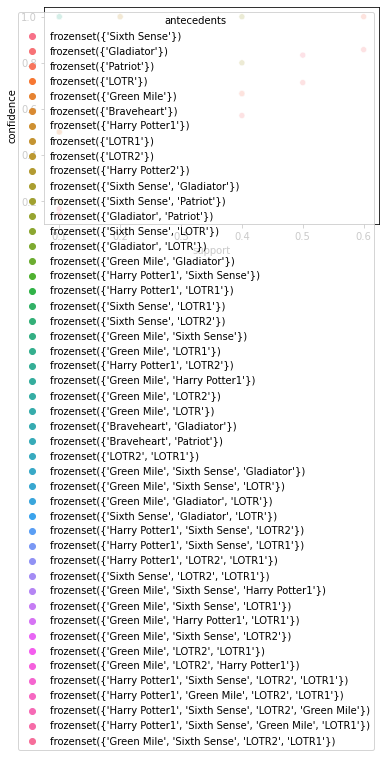

In [ ]:
sns.scatterplot('support', 'confidence', data=rules, hue='antecedents')
plt.show()